# Introdução ao Scikit-learn

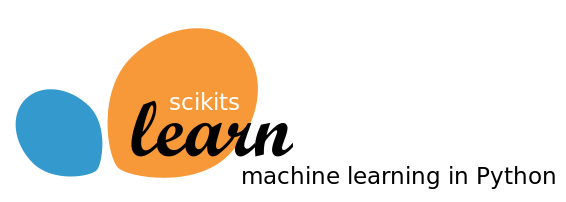

O scikit-learn é uma poderosa ferramenta para aprendizado de máquina em python de código aberto (open source) e pode ser usado comercialmente (licença BSD). Construído sobre as bibliotecas NumPy, SciPy e matplotlib, possui ferramentas simples e eficientes para mineração e análise de dados, sendo uma biblioteca acessível e reutilizável em vários contextos.

#### O scikit-learn requer python (> = 3.5)

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [42]:
heart = pd.read_csv('../../scr/datasets/heart.csv', index_col=0)

In [43]:
heart.columns

Index(['Age', 'Sex', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'ExAng',
       'Oldpeak', 'Slope', 'Ca', 'ChestPain_asymptomatic',
       'ChestPain_nonanginal', 'Thal_fixed', 'Thal_normal', 'HeartDisease'],
      dtype='object')

In [44]:
len(heart)

297

In [45]:
print("Proporção de doentes e não doentes: ")

doentes = len(heart[heart["HeartDisease"]=="Yes"])/len(heart)
nao_doentes = len(heart[heart["HeartDisease"]=="No"])/len(heart)
print(f"\n\t - Doentes: {doentes}\n\t - Não Doentes: {nao_doentes}")

Proporção de doentes e não doentes: 

	 - Doentes: 0.4612794612794613
	 - Não Doentes: 0.5387205387205387


## Treino e Teste

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
explicativa = heart.drop(["HeartDisease"], axis=1)
resposta = heart["HeartDisease"]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(explicativa, 
                                                    resposta, 
                                                    test_size=0.3, 
                                                    stratify=resposta)

In [49]:
X_train.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,Thal_fixed,Thal_normal
147,45,1,128,308,0,2,170,0,0.0,1,0,0,0,0,1
83,68,1,180,274,1,2,150,1,1.6,2,0,0,1,0,0
149,52,1,152,298,1,0,178,0,1.2,2,0,0,0,0,0
26,58,0,120,340,0,0,172,0,0.0,1,0,0,1,0,1
128,62,0,124,209,0,0,163,0,0.0,1,0,1,0,0,1


In [50]:
X_test.head()

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,Thal_fixed,Thal_normal
51,65,1,120,177,0,0,140,0,0.4,1,0,1,0,0,0
67,54,1,150,232,0,2,165,0,1.6,1,0,0,1,0,0
209,41,1,130,214,0,2,168,0,2.0,2,0,0,1,0,1
146,41,1,112,250,0,0,179,0,0.0,1,0,0,1,0,1
269,71,0,112,149,0,0,125,0,1.6,2,0,1,0,0,1


In [51]:
y_train.head()

147     No
83     Yes
149     No
26      No
128     No
Name: HeartDisease, dtype: object

In [52]:
y_test.head()

51     No
67     No
209    No
146    No
269    No
Name: HeartDisease, dtype: object

Verificando se as propoções permanacem iguais.

In [53]:
print("Proporção de doentes e não doentes: ")
doentes = len(y_train[y_train=="Yes"])/len(y_train)
nao_doentes = len(y_train[y_train=="No"])/len(y_train)

print(f"\n\t - Doentes: {doentes}\n\t - Não Doentes: {nao_doentes}")

Proporção de doentes e não doentes: 

	 - Doentes: 0.45893719806763283
	 - Não Doentes: 0.5410628019323671


## Modelos

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [55]:
lr = LogisticRegression(solver='liblinear',multi_class='ovr')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8

In [56]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.5444444444444444

In [57]:
rf = RandomForestClassifier(n_estimators=40)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8

## Avaliação do modelo

### Matriz de confusão

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
logistic_regression = LogisticRegression(solver='liblinear',multi_class='ovr').fit(X_train, y_train)

y_pred = logistic_regression.predict(X_test)
cm = confusion_matrix(y_test, y_pred)/len(y_test)
pd.DataFrame(cm)

,0,1
0,0.488889,0.044444
1,0.155556,0.311111


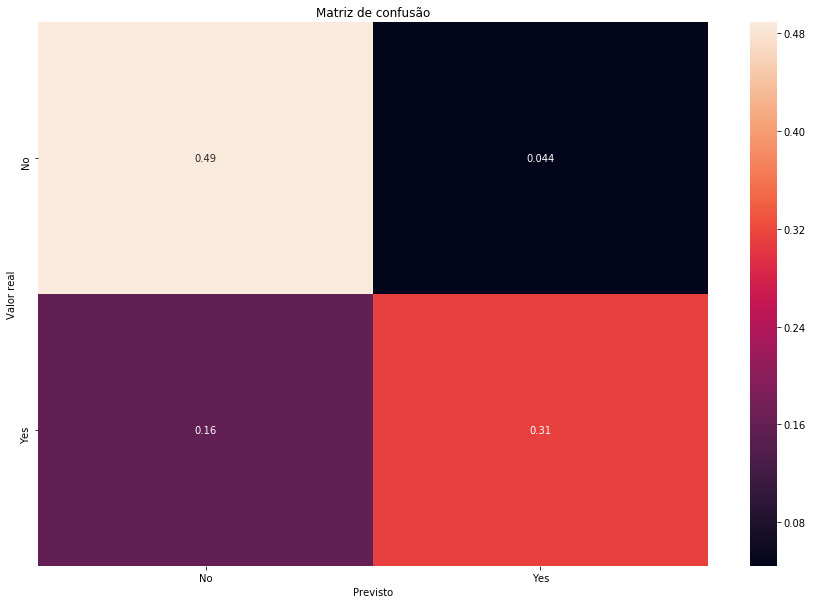

In [60]:
plt.figure(figsize=(15, 10))
ax = plt.subplot()

sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Previsto');ax.set_ylabel('Valor real'); 
ax.set_title('Matriz de confusão'); 
ax.xaxis.set_ticklabels(y_test.unique()); ax.yaxis.set_ticklabels(y_test.unique());
plt.show()

### Métricas da matriz de confusão

In [61]:
from sklearn.metrics import cohen_kappa_score, accuracy_score

#kappa    
print(cohen_kappa_score(y_test, y_pred))
#Acurácia
print(accuracy_score(y_test,y_pred))


0.5921450151057401
0.8


## Kfold e Kfold Estratificado

In [62]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [63]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [64]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_logistic = []
scores_svm = []
scores_rf = []

for train_index, test_index in folds.split(explicativa, resposta):
    
    X_train = explicativa.iloc()[train_index].values
    X_test = explicativa.iloc()[test_index].values
    y_train = resposta.iloc()[train_index].dropna()
    y_test = resposta.iloc()[test_index].dropna()

    logistic_regression = LogisticRegression(solver='liblinear',multi_class='ovr')
    svc = SVC(gamma='auto')
    random_florest = RandomForestClassifier(n_estimators=40)
    
    scores_logistic.append(get_score(logistic_regression, X_train, X_test, y_train, y_test))
    scores_svm.append(get_score(svc, X_train, X_test, y_train, y_test))
    scores_rf.append(get_score(random_florest, X_train, X_test, y_train, y_test))

In [65]:
from statistics import mean

In [66]:
mean(scores_logistic)

0.8315694358551501

In [67]:
mean(scores_svm)

0.5421246478389335

In [68]:
mean(scores_rf)

0.8281344052772625

## Cross-Validation

In [69]:
from sklearn.model_selection import cross_val_score

In [70]:
cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), 
                explicativa, 
                resposta,cv=3)

array([0.83      , 0.85858586, 0.80612245])

In [71]:
cross_val_score(SVC(gamma='auto'), 
                explicativa, 
                resposta,cv=3)

array([0.54      , 0.53535354, 0.55102041])

In [72]:
cross_val_score(RandomForestClassifier(n_estimators=40), 
                explicativa, 
                resposta,cv=3)

array([0.84      , 0.81818182, 0.75510204])